In [1]:
import pandas as pd
import networkx as nx
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
df=pd.read_csv('asoiaf-all-edges.csv')

In [3]:
df.head()

,Source,Target,Type,id,weight
0,Addam-Marbrand,Brynden-Tully,Undirected,0,3
1,Addam-Marbrand,Cersei-Lannister,Undirected,1,3
2,Addam-Marbrand,Gyles-Rosby,Undirected,2,3
3,Addam-Marbrand,Jaime-Lannister,Undirected,3,14
4,Addam-Marbrand,Jalabhar-Xho,Undirected,4,3


In [4]:
df['distance']=100-df['weight']

In [5]:
G = nx.Graph()
nodes=df['Source'].tolist()
G.add_nodes_from(nodes)

In [6]:
edges=[]
for i in range(len(df['Source'])):
    edge=[df['Source'].iloc[i],df['Target'].iloc[i],df['distance'].iloc[i]]
    edges.append(edge)
    G.add_edge(edge[0],edge[1],distance=edge[2])

/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


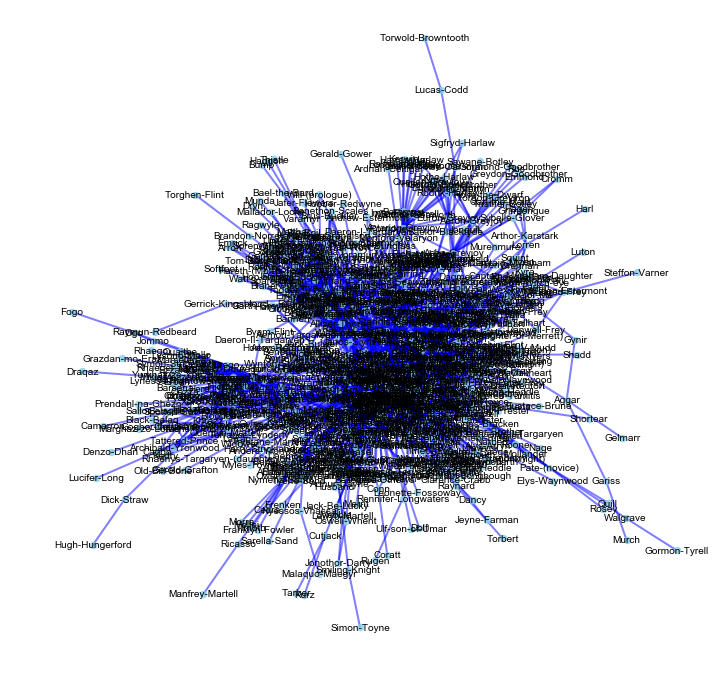

In [7]:
pos=nx.spring_layout(G)
fig = plt.figure(1,figsize=(12,12))
# nodes
nx.draw_networkx_nodes(G,pos,
                       node_color='skyblue',
                       node_size=50,alpha=0.8)

# edges
#nx.draw_networkx_edges(sub_graph,pos,width=1.0,alpha=0.5)
nx.draw_networkx_edges(G,pos,
                       edgelist=edges,
                       width=2,alpha=0.5,edge_color='b')


node_name={}
for node in G.nodes():
    node_name[node]=str(node)


nx.draw_networkx_labels(G,pos,node_name,font_size=10)

plt.axis('off')
fig.show() # display

In [8]:
from networkx.algorithms import closeness_centrality

In [9]:
#nearest to all other nodes
c_c = closeness_centrality(G,distance='weight')
#from collections import OrderedDict
#cc = OrderedDict(sorted(c_c.items(),key = lambda x: x[1],reverse = True))
closeness=[(key,value) for key,value in c_c.items()]
closeness.sort(key=lambda k:k[1],reverse=True)
#closeness[:20]

In [10]:
bottleneck = nx.betweenness_centrality(G)
bottleneck_node = max(bottleneck, key=bottleneck.get)
bottleneck=[(key,value) for key,value in bottleneck.items()]
bottleneck.sort(key=lambda k:k[1],reverse=True)
#bottleneck[:20]

In [52]:
def draw_plot(list_):
    fig = plt.figure(figsize=(12, 8))
    count=np.array([list_[i][1] for i in range(len(list_))])
    name=np.array([list_[i][0] for i in range(len(list_))])
    plt.plot(name,count,marker='o')
    plt.xticks(rotation = 90, fontsize = 16)
    plt.yticks(fontsize = 12)
    plt.show()
    return

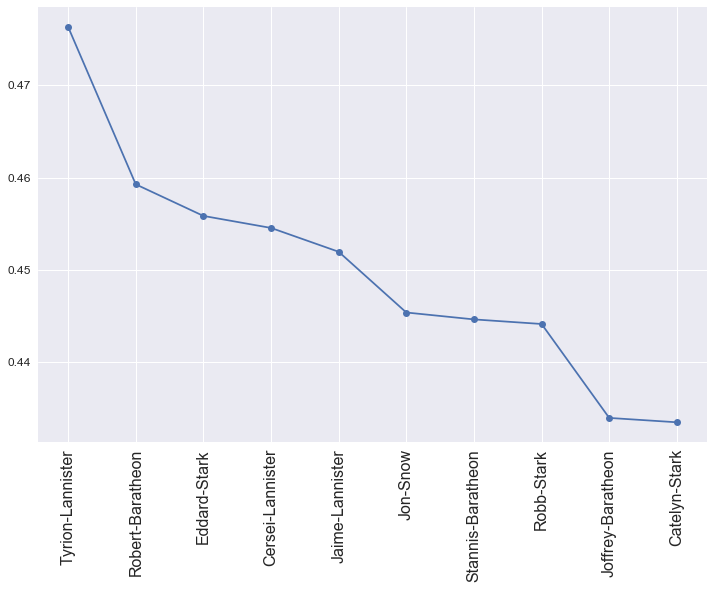

In [53]:
draw_plot(closeness[:10])

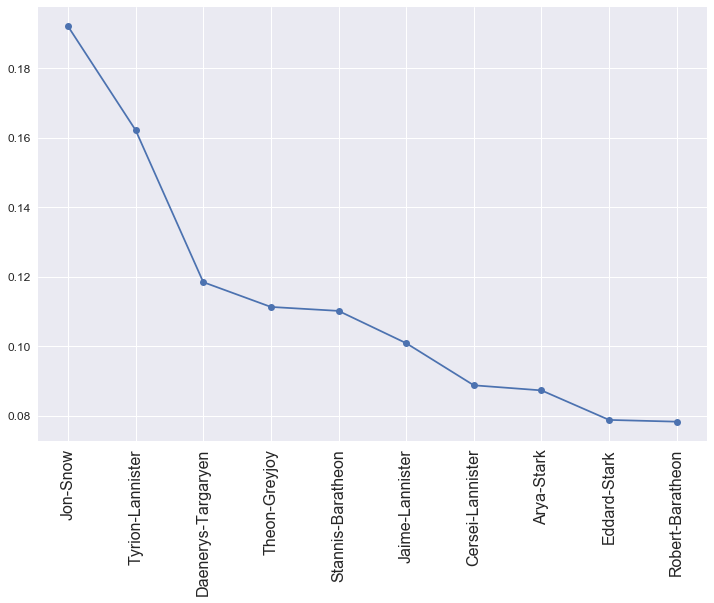

In [54]:
draw_plot(bottleneck[:10])